<a href="https://colab.research.google.com/github/purpCactus/pythonia.init/blob/main/Session_10/RNN_AirlineProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing libs

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Read and splitting the data

In [ ]:
dataset = pd.read_csv('/content/datasets_11956_16450_international-airline-passengers.csv')
training_set = dataset.iloc[0:100,1:2].values
test_set = dataset.iloc[100:144,1:2].values
whole_set = dataset.iloc[:,1:2].values

# Scaling data

In [ ]:
from sklearn.preprocessing import RobustScaler
sc = RobustScaler()
whole_set_scaled = sc.fit_transform(whole_set)

# Splitting Test and Train datasets

In [ ]:
x_train = whole_set_scaled[0:100, 0:1]
y_train = whole_set_scaled[0:100, 0:1]
x_test = whole_set_scaled[100:144, 0:1]
y_test = whole_set_scaled[100:144, 0:1]

# Reshaping datasets to 3D ndarrays for LSTM model

In [ ]:
x_train = np.reshape(x_train,(x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Building the RNN model

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

model = Sequential()

# LSTM first layer
model.add(LSTM(units=5, return_sequences=True, input_shape=(x_train.shape[1], 1)))
# LSTM second layer
model.add(LSTM(units=2, return_sequences=False))
# Dense ourput layer
model.add(Dense(units=1))

# Compile
model.compile(optimizer='adam', loss='mean_squared_error')
# Fit
model.fit(x_train, y_train, epochs=150, batch_size=1, validation_data=(x_test, y_test))

Epoch 1/150
100/100 [==============================] - 20s 14ms/step - loss: 0.2454 - val_loss: 1.0176
Epoch 2/150
100/100 [==============================] - 0s 2ms/step - loss: 0.1797 - val_loss: 1.0944
Epoch 3/150
100/100 [==============================] - 0s 3ms/step - loss: 0.1458 - val_loss: 1.1039
Epoch 4/150
100/100 [==============================] - 0s 3ms/step - loss: 0.1218 - val_loss: 1.0366
Epoch 5/150
100/100 [==============================] - 0s 3ms/step - loss: 0.0766 - val_loss: 0.9276
Epoch 6/150
100/100 [==============================] - 0s 3ms/step - loss: 0.0519 - val_loss: 0.8138
Epoch 7/150
100/100 [==============================] - 0s 3ms/step - loss: 0.0433 - val_loss: 0.7037
Epoch 8/150
100/100 [==============================] - 0s 3ms/step - loss: 0.0285 - val_loss: 0.6168
Epoch 9/150
100/100 [==============================] - 0s 3ms/step - loss: 0.0127 - val_loss: 0.5496
Epoch 10/150
100/100 [==============================] - 0s 2ms/step - loss: 0.0113 - val_

# Making prediction for the test set

In [ ]:
x_test_pred = model.predict(x_test)

# Making prediction for the train set

In [ ]:
x_train_pred = model.predict(x_train)

# Inverse the Scaling for better visualization

In [ ]:
# x_train_pred = np.reshape(x_train_pred, (-1, 1))
x_train_pred = sc.inverse_transform(x_train_pred)
x_test_pred = sc.inverse_transform(x_test_pred)

# Visualizing the result

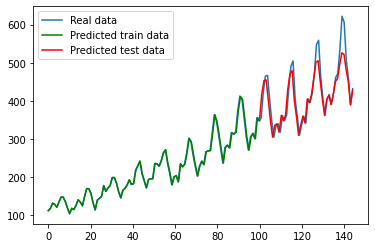

In [ ]:
xAxis = np.linspace(0, 144, 144)
plt.plot(xAxis, whole_set, label='Real data')
xAxis = np.linspace(0, 100, num=100)
plt.plot(xAxis, x_train_pred, 'green', label='Predicted train data')
xAxis = np.linspace(100, 144, 44)
plt.plot(xAxis, x_test_pred, 'red', label='Predicted test data')
plt.legend()
plt.show()